<a href="https://colab.research.google.com/github/Bienbaz/Bienbaz/blob/main/Ghost_in_the_Machine_Detecting_Memory_Resident_POS_Malware_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib

In [6]:
import pandas as pd
import io
from google.colab import files

# 1. Trigger the upload widget
print("Please upload your dataset (CSV file)...")
uploaded = files.upload()

# 2. Automatically get the filename of the file you just uploaded
# (This prevents errors if your file is named differently)
filename = list(uploaded.keys())[0]
print(f"Successfully uploaded: {filename}")

# 3. Read the content into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# 4. Quick look at the data
print("Dataset Shape:", df.shape)
df.head()

Please upload your dataset (CSV file)...


Saving Obfuscated-MalMem2022.csv to Obfuscated-MalMem2022.csv
Successfully uploaded: Obfuscated-MalMem2022.csv
Dataset Shape: (58596, 57)


,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


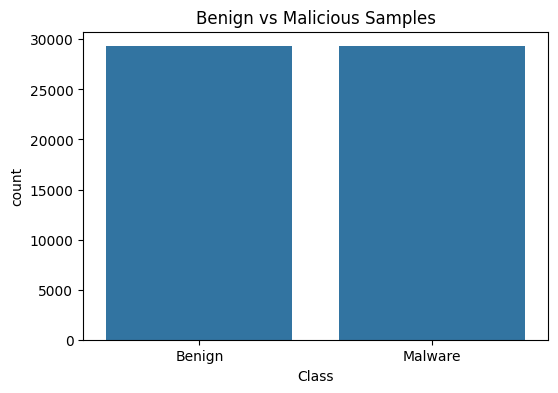

Training samples: 46876
Testing samples: 11720


In [7]:
# Check for Class Balance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Benign vs Malicious Samples')
plt.show()

# Encoding: The dataset has a 'Class' column (Benign/Malware) and 'Category' (Spyware, etc.)
# We will focus on Binary Classification: Is this POS system infected? (Yes/No)

# Drop the specific 'Category' column to focus on detection first
# Also drop metadata columns if any (usually the first column is an index)
X = df.drop(['Class', 'Category'], axis=1)
y = df['Class'].map({'Benign': 0, 'Malware': 1}) # Convert to binary

# Handle any missing values (though this dataset is usually clean)
X = X.fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

In [8]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("Training the model... (this may take a minute)")
rf_model.fit(X_train, y_train)
print("Training complete!")

Training the model... (this may take a minute)
Training complete!


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



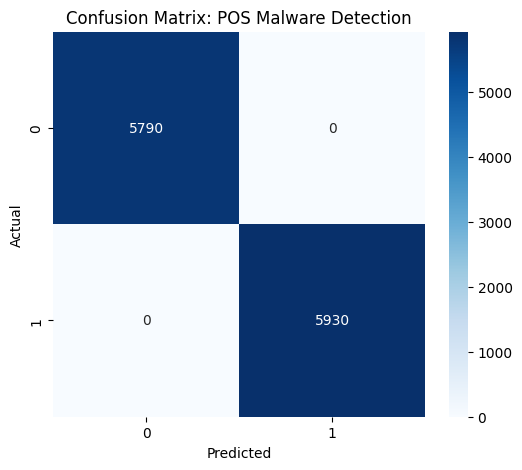

In [9]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: POS Malware Detection')
plt.show()

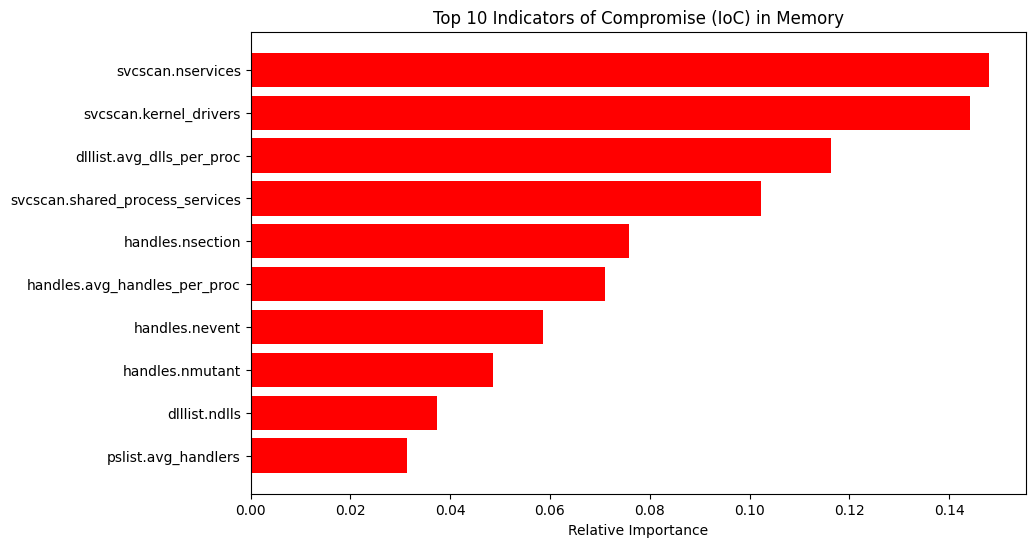

In [10]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:] # Top 10 features

plt.figure(figsize=(10,6))
plt.title('Top 10 Indicators of Compromise (IoC) in Memory')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()